In [1]:
import os
import pandas as pd
from PIL import Image
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from skimage import feature
from skimage import exposure
from skimage.feature import hog
import dlib
import pandas as pd

In [2]:
# Initialize empty lists to store image data and labels
images = []
labels = []
hog_train_images = []
hog_train_features = []

In [3]:
# Load the CK+ dataset CSV file into a pandas DataFrame
df = pd.read_csv('ckextended.csv')

# Access the "emotion" column and convert it to a NumPy array
emotion_array = df['emotion'].values

# Assuming the "pixels" column contains strings representing pixel values separated by spaces
# Convert each string of pixels to a list of integers
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(), dtype=int))

# Convert the "pixels" column to a NumPy array
pixels_array = np.array(df['pixels'].tolist())

# Reshape the NumPy array to a 3D array with dimensions (number_of_samples, 48, 48)
pixels_array_reshaped = pixels_array.reshape((pixels_array.shape[0], 48, 48))

In [4]:
X_train = pixels_array_reshaped[df['Usage'] == 'Training']
y_train = emotion_array[df['Usage'] == 'Training']

In [5]:
# Iterate through the selected sample indices
for i in range(734):
    original_image = X_train[i]
    hog_feature, hog_image = hog(original_image, pixels_per_cell=(16,16), cells_per_block=(2,2), visualize=True)
    #hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range(0,5))
    hog_train_features.append(hog_feature)
    hog_train_images.append(hog_image)

In [6]:
# Convert the list of HOG images to a NumPy array
hog_train_images = np.array(hog_train_images)

# Now, 'hog_images' contains the HOG representations of all images
print("HOG train Images shape:", hog_train_images.shape)

HOG train Images shape: (734, 48, 48)


In [7]:
# Define emotion labels corresponding to subdirectories
emotion_labels = {'anger':0, 'disgust':1, 'fear':2, 'happy':3, 'sadness':4, 'surprise':5, 'contempt':6,'neutral':7}
# Define a mapping dictionary from numeric labels to emotion names
emotion_names = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sadness', 5: 'surprise', 6: 'contempt',7:'neutral'}

In [8]:
# You can access individual original and LBP images by indexing the arrays
# For example, to access the first original and LBP images:
index = random.randint(0, 734)
original_image = X_train[index]
hog_image = hog_train_images[index]
numeric_label = y_train[index]
# Get the emotion name or 'Unknown' if not found
emotion_name = emotion_names.get(numeric_label, 'Unknown')

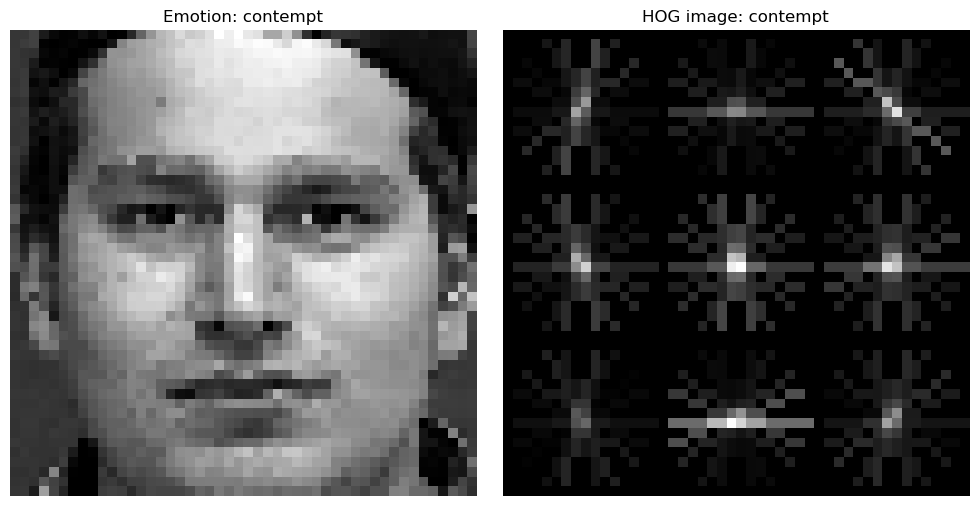

In [9]:
# Create subplots for the random image and its LBP representation
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

# Display the original image
ax_original = axes[0]
ax_original.imshow(original_image, cmap='gray')
ax_original.set_title(f"Emotion: {emotion_name}")
ax_original.axis('off')
    
# Display the LBP representation
ax_lbp = axes[1]
ax_lbp.imshow(hog_image, cmap='gray')
ax_lbp.set_title(f"HOG image: {emotion_name}")
ax_lbp.axis('off')
 
plt.tight_layout()
plt.show()

In [10]:
hog_train_features

[array([0.23445696, 0.23445696, 0.23445696, 0.040102  , 0.0886343 ,
        0.15670101, 0.08537424, 0.05611214, 0.1096639 , 0.11365661,
        0.07287209, 0.06293038, 0.16272426, 0.12433717, 0.1643142 ,
        0.11964219, 0.08377638, 0.0648246 , 0.23445696, 0.13719597,
        0.08047888, 0.10211108, 0.16019399, 0.22754897, 0.06912752,
        0.22915206, 0.22296568, 0.23445696, 0.23445696, 0.21192091,
        0.10226227, 0.17560429, 0.16046881, 0.23445696, 0.23445696,
        0.23445696, 0.1007307 , 0.06458451, 0.05577344, 0.14421799,
        0.11019658, 0.14562711, 0.10603555, 0.07424868, 0.05745225,
        0.11237394, 0.02625197, 0.03052034, 0.04400252, 0.23937526,
        0.2069654 , 0.2444668 , 0.2444668 , 0.0902018 , 0.2444668 ,
        0.23876952, 0.18781962, 0.09063221, 0.1556332 , 0.14221904,
        0.22496055, 0.2444668 , 0.2444668 , 0.16208407, 0.07620782,
        0.2444668 , 0.17920888, 0.203467  , 0.1197638 , 0.07832255,
        0.2444668 , 0.20960132, 0.23121103, 0.10

In [11]:
X_test = pixels_array_reshaped[df['Usage'] != 'Training']
y_test = emotion_array[df['Usage'] != 'Training']

In [12]:
X_test.shape

(186, 48, 48)

In [13]:
hog_test_features = []
hog_test_images = []

In [14]:
# Iterate through the selected sample indices
for i in range(186):
    original_image = X_test[i]
    hog_feature, hog_image = hog(original_image, pixels_per_cell=(16,16), cells_per_block=(2,2), visualize=True)
    #hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range(0,5))
    hog_test_features.append(hog_feature)
    hog_test_images.append(hog_image)

In [15]:
hog_train_features = np.array(hog_train_features)
hog_train_images = np.array(hog_train_images)

In [16]:
hog_test_features = np.array(hog_test_features)
hog_test_images = np.array(hog_test_images)

In [17]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# Assuming 'hog_features' contains HOG feature vectors
# Assuming 'labels' contains corresponding emotion labels
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

In [20]:
# Initialize and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(hog_train_features, y_train)

SVC(kernel='linear')

In [21]:
# Make predictions on the test data
y_pred_train = svm_classifier.predict(hog_train_features)

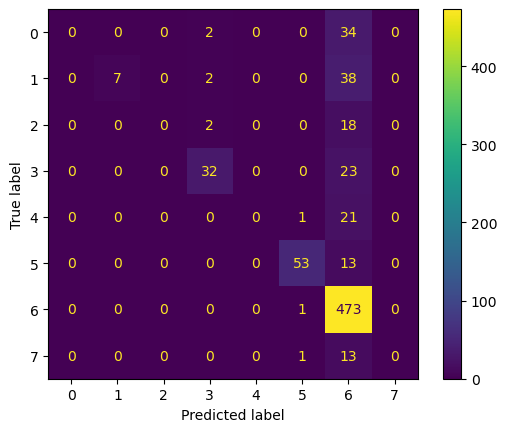

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred_train, labels=svm_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot()
plt.show()

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_train, y_pred_train)
report = classification_report(y_train, y_pred_train)

print("Train Accuracy:", accuracy)
print("Classification Report:\n", report)

Train Accuracy: 0.7697547683923706
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       1.00      0.15      0.26        47
           2       0.00      0.00      0.00        20
           3       0.84      0.58      0.69        55
           4       0.00      0.00      0.00        22
           5       0.95      0.80      0.87        66
           6       0.75      1.00      0.85       474
           7       0.00      0.00      0.00        14

    accuracy                           0.77       734
   macro avg       0.44      0.32      0.33       734
weighted avg       0.69      0.77      0.70       734



C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Make predictions on the test data
y_pred_test = svm_classifier.predict(hog_test_features)

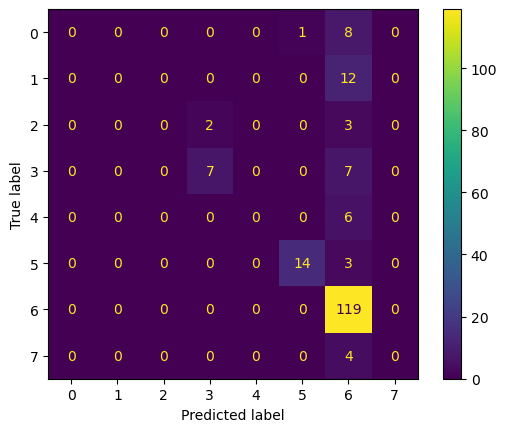

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=svm_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot()
plt.show()

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)

Test Accuracy: 0.7526881720430108
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         5
           3       0.78      0.50      0.61        14
           4       0.00      0.00      0.00         6
           5       0.93      0.82      0.87        17
           6       0.73      1.00      0.85       119
           7       0.00      0.00      0.00         4

    accuracy                           0.75       186
   macro avg       0.31      0.29      0.29       186
weighted avg       0.61      0.75      0.67       186



C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vvsst\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(64,128), activation='relu', solver='adam', max_iter=1000, random_state=1)
clf.fit(hog_train_features,y_train)

MLPClassifier(hidden_layer_sizes=(64, 128), max_iter=1000, random_state=1)

In [28]:
y_pred_train = clf.predict(hog_train_features)

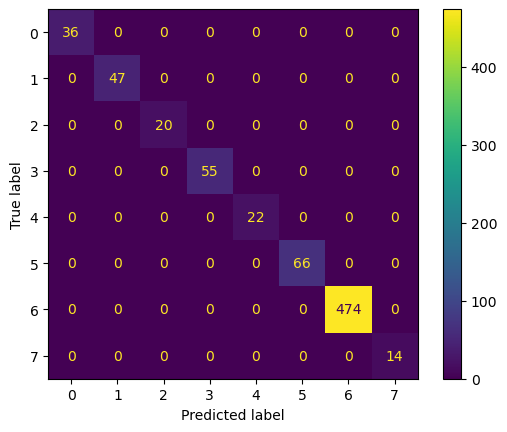

In [29]:
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [30]:
# Evaluate the model
accuracy = accuracy_score(y_train, y_pred_train)
report = classification_report(y_train, y_pred_train)

print("Train Accuracy:", accuracy)
print("Classification Report:\n", report)

Train Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        66
           6       1.00      1.00      1.00       474
           7       1.00      1.00      1.00        14

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [31]:
y_pred_test  = clf.predict(hog_test_features)

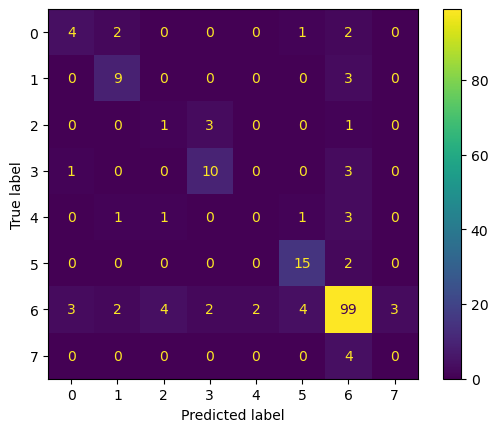

In [32]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", report)

Test Accuracy: 0.7419354838709677
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.64      0.75      0.69        12
           2       0.17      0.20      0.18         5
           3       0.67      0.71      0.69        14
           4       0.00      0.00      0.00         6
           5       0.71      0.88      0.79        17
           6       0.85      0.83      0.84       119
           7       0.00      0.00      0.00         4

    accuracy                           0.74       186
   macro avg       0.44      0.48      0.46       186
weighted avg       0.73      0.74      0.73       186

